<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Ameer, my name is Dmitrii Pyshnenko. Happy to review your project! 🙌

As usual you can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 



<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Overall well done! I can see that a lot of effort has been made! Your project already looks really good, and you accomplished impressive results.

However, there are some comments/areas left to fix that will help you to make your project even better:

- Fix a typo in the data aggregation for calls. 
  
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
</div>

Hi Dimitri!
Thanks for your review, really helpful insights! 
I fixed the typo and changed duraion into duration :) (it is easy to miss the small things when the project is sorta big)
Thanks for all the other tips as well, I will surely be looking into them next monday (when I have some free time finally :/)
Have a good day!

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Hi Ameer! Very glad that smth was useful for you and thank you for submitting your project with all corrections! 
- Now everything is perfect. No critical issues left, so your project has been accepted! 
- Wish you cool projects in the next sprints! ☘️
    
PS: As a last thing, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo  🙌

</div>

# Which plan is more profitable?

We work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, *Surf* and *Ultimate*. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

**Purpose of the project:** We are going to carry out a preliminary analysis of the plans based on a relatively small client selection. We'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. The job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

**Plan of work:** We are going to start by inspecting the data we were given, evaluate it by looking from an overall and general prespective and then look closer for errors, duplicates, missing values etc. Once we are done with these steps, we can proceed to fixing these problematic data by removing unnecessary trash data, correcting all the values that can be corrected and retaining missing values where possible. Then we move on with our clean data and start studying the relation between the factors we have through graphs and a wide range of methods that python offer us, and finally decide which plan of the prepaid plans that the company offers is more profitable!



<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you added additional information about the project goal and tasks.

## Initialization

### Loading the data

We start by loading the libraries

In [1]:
import pandas as pd
import numpy as np
import math as mt
import datetime as dt
from scipy import stats as st

Next we load the data:

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

We loaded all the data, seperated them into 5 different dataframes, a dataframe for each category.

Next we are going to have a general look at the data that we have, just to get an idea of what we are up against:

In [3]:
calls.info()
calls.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


**Calls** dataset contains the following fields:
* id — unique call identifier
* call_date — call date
* duration — call duration (in minutes)
* user_id — the identifier of the user making the call

In [4]:
internet.info()
internet.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


**Internet** dataset contains the following fields:
* id — unique session identifier
* mb_used — the volume of data spent during the session (in megabytes)
* session_date — web session date
* user_id — user identifier

In [5]:
messages.info()
messages.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


**Messages** dataset contains the followings fields:
* id — unique text message identifier
* message_date — text message date
* user_id — the identifier of the user sending the text

In [6]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Plans** dataset contains the following fields:
* plan_name — calling plan name
* usd_monthly_fee — monthly charge in US dollars
* minutes_included — monthly minute allowance
* messages_included — monthly text allowance
* mb_per_month_included — data volume allowance (in megabytes)
* usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st * minute will be charged)
* usd_per_message — price per text after exceeding the package limits
* usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

In [7]:
users.info()
users.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


**Users** dataset contain the following fields:
* user_id — unique user identifier
* first_name — user's name
* last_name — user's last name
* age — user's age (years)
* reg_date — subscription date (dd, mm, yy)
* churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was retrieved)
* city — user's city of residence
* plan — calling plan name

Our thoughts after the very first look at the data, we can see we have minimal number of errors. There's no missing values in any of the datasets we received and the data looks very clean. Except for one thing that we notice and that is the dates are in string format and it would be helpful to convert them into a datetime format.

*We also noticed alot of missing values in the **users** dataset in the **churn_date** column, but this is actually completely fine since missing values in this column, specifically, means that the user still didn't stop the service, as stated in the information of the dataset fields above.*

Still, we cannot proceed to study our data before we make a thorough and deep look into it. Looking remotely and in general doesn't always give us the best idea about the data. Therefore, **next** we are going to evaluate the data even more and dig deeper to check for any hidden errors, duplicates etc.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Good start, first view on data and next steps!

### Exploring the data and Treating problematic values
#### Exploring the data and treating missing values
We are going to start our data exploration by looking for incorrect values and types, for instance; rows with the same values but with different letter cases this will help us get rid of any duplicates, if there's any, later.

Only the **users** dataframe contains strings of names and cities so we start with it:

In [8]:
# The following line of code generates a long list, no need to run if not interested
# we could've used the RE library to check for formats but this is sort of unnecessary here...
users['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [9]:
# The following line of code generates a long list, no need to run if not interested
users['first_name'].unique()

array(['Anamaria', 'Mickey', 'Carlee', 'Reynaldo', 'Leonila', 'Livia',
       'Jesusa', 'Eusebio', 'Emely', 'Gerry', 'Wilber', 'Halina',
       'Jonelle', 'Nicolas', 'Edmundo', 'Beata', 'Jann', 'Boris',
       'Dennis', 'Shizue', 'Rutha', 'Ricarda', 'Bo', 'Jack', 'Yuki',
       'Jess', 'Meggan', 'Georgeanna', 'Jefferey', 'Franklyn', 'Chase',
       'Lane', 'Delila', 'Latoyia', 'Jc', 'Jeff', 'Myron', 'Reena',
       'Olympia', 'Flo', 'Paris', 'Drucilla', 'Clementina', 'Carlos',
       'Devora', 'Barney', 'Yuk', 'Linwood', 'Loise', 'Jone', 'Rosario',
       'Edmond', 'Piper', 'Denis', 'Patrick', 'Theo', 'Reinaldo', 'Avril',
       'Denisse', 'Maryam', 'Kristeen', 'Larhonda', 'Gerardo', 'Sherlyn',
       'Ariel', 'Robt', 'Marcel', 'Dino', 'Jacelyn', 'Isa', 'Seymour',
       'Grady', 'Particia', 'Salena', 'Ronny', 'Chau', 'Earnest', 'Brian',
       'Neal', 'Grayce', 'Dominic', 'Lyndia', 'Wiley', 'Ignacio', 'Adena',
       'Lenard', 'Malena', 'Brock', 'Taylor', 'Taren', 'Karima', 'Walter',


In [10]:
# The following line of code generates a long list, no need to run if not interested
users['last_name'].unique()

array(['Bauer', 'Wilkerson', 'Hoffman', 'Jenkins', 'Thompson', 'Shields',
       'Bradford', 'Welch', 'Little', 'Blair', 'Henry', 'Mcbride',
       'Snider', 'Simon', 'Carpenter', 'Salinas', 'Gates', 'Grimes',
       'Landry', 'Bell', 'Booker', 'Snow', 'Delaney', 'Tyson',
       'Wilkinson', 'Hamilton', 'Cardenas', 'Rasmussen', 'Henson', 'Kane',
       'Martin', 'Dalton', 'Moran', 'Gentry', 'Cummings', 'Hodge',
       'Velazquez', 'Hicks', 'Santos', 'Lynn', 'Mclaughlin', 'Hinton',
       'Galloway', 'Ortega', 'Hooper', 'French', 'Terrell', 'Avery',
       'Owen', 'Gibbs', 'Hopkins', 'Espinoza', 'Frost', 'Mclean',
       'Chandler', 'Sargent', 'Colon', 'Richardson', 'Valencia', 'Head',
       'Hartman', 'Ashley', 'Noel', 'Woods', 'Allen', 'Jimenez', 'Fry',
       'Contreras', 'Roy', 'Spence', 'Crawford', 'Fuller', 'Bates',
       'Browning', 'Webster', 'Gray', 'Mccall', 'Mcgee', 'Sears', 'Witt',
       'Acevedo', 'Mckinney', 'Bennett', 'Macias', 'Atkinson',
       'Robertson', 'Kelley',

In [11]:
# Check for any errors in the age category
print('Age range', users['age'].min(), '-', users['age'].max())

Age range 18 - 75


In [12]:
# Check for errors in the plans field
users['plan'].unique()

array(['ultimate', 'surf'], dtype=object)

In [13]:
# Check for dups in the id column
users['user_id'].duplicated().sum()

0

After inspecting the data of the **users** dataset closely, we didn't find any major issues, other than the type of the dates.
Therefore, next we are going to convert the dates from strings into datetimes.

In [14]:
# Converting dates to datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [15]:
# Checking if the conversion worked
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    34 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


We converted the dates into datetime and we're finished with the **users** dataframe. Lets move on to another dataframe.
Next we are going to deal with errors in the **internet** dataframe

In [16]:
# Checking if the ranges make sense
print('User_id range', internet['user_id'].min(), '-', internet['user_id'].max())
print('Mb_used range', internet['mb_used'].min(), '-', internet['mb_used'].max())

User_id range 1000 - 1499
Mb_used range 0.0 - 1693.47


In [17]:
# Remvoing rows with 0 as mb_used
internet = internet.query('mb_used > 0')

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you've added a solution for zero-based internet sessions.

On a real project, of course, you can always find out the reason for such zeros. But in this case, it is enough to consider the alternatives and the impact of each decision.

In [18]:
# check for dups in the id column
internet['id'].duplicated().value_counts()

False    91078
Name: id, dtype: int64

In [19]:
# converting the dates into datetime type
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 4 columns):
id              91078 non-null object
user_id         91078 non-null int64
session_date    91078 non-null datetime64[ns]
mb_used         91078 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.5+ MB


In [20]:
# Adding a gigabyte column and a month column
internet['month'] = internet['session_date'].dt.month
internet['gb_used'] = internet['mb_used']/1024
internet.head(5)

,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590
5,1001_0,1001,2018-08-24,284.68,8,0.278008


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
Everything is correct here but usually, it is always helpful to double-check whether we indeed have data within one year/time period. If not then selecting and aggregating data by the month number will cause an issue. So here it is safer to use datetime64[M] which provides a complete date. 

There is not much to check in the **internet** dataframe, other than the ranges for the **user_id** and **mb_used**, and by the looks of it; they make complete sense. We also checked for duplicates in the **id** column and found none, then we converted the dates from strings to datetime and added a **gb_used** column since the company measures the data usage by Gigabyte and not Megabyte and a **month** column for later use. Other than that, we decided to remove all the rows with 0 mbs used since they won't be included when charging the customer and having useless rows isn't a good idea.

Next we'll check the **messages** dataframe for any problematic values

In [21]:
# check for dups in the message ids
print(messages['id'].duplicated().sum())

0


In [22]:
# Check for the range of user_ids
print('user_id range', messages['user_id'].min(), '-', messages['user_id'].max())

user_id range 1000 - 1497


In [23]:
# converting the dates into datetime type
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [24]:
# adding a message month column
messages['month'] = messages['message_date'].dt.month
messages.head(5)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


After checking for errors in the **messages** dataframes, we ended up with 0 duplicates, and a range of 498 user ids. This means we have some missing user ids, but this is fine, because it only means that some users didn't send messages at all while using the service. Other than that, we also converted dates from strings into datetimes and then added a **month** column for later use!

Now that we're done with **messages** we are left with one dataframe to inspect, the **calls** dataframe

In [25]:
# Check for dups in the id column
calls['id'].duplicated().sum()

0

In [26]:
# Check for user ids
calls['user_id'].unique().shape[0]

481

In [27]:
# Checking for calls with 0 mins
print('Zeros calls percentage: {:.2%}'.format(calls.query('duration == 0').shape[0]/calls.shape[0]))

Zeros calls percentage: 19.48%


Looking at the results we got, there are no duplicates, we have 481 user ids in the dataframe (which is very reasonable). But, we found a high percentage of calls with duration of 0 minutes (0 seconds), since 0 minutes = 0 seconds this means we can remove those calls from our dataframe without losing anything significant value at all because the company won't be charging for them.

In [28]:
# Remvoing the 0 mins rows from our dataframe
calls = calls.query('duration > 0')
calls.shape[0]

110901

In [29]:
# converting the dates into datetime type
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
id           110901 non-null object
user_id      110901 non-null int64
call_date    110901 non-null datetime64[ns]
duration     110901 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [30]:
# adding a call month column
calls['month'] = calls['call_date'].dt.month
calls.head(5)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [31]:
# Rounding up the minutes
calls['duration'] = np.ceil(calls['duration'])
calls.head(5)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Ok, great job! Good that you did not forget about data rounding. Also, great choice of np.ceil () method :)



We removed the zero mins from the calls dataframe and converted the dates from strings to datetimes and then added a **month** column for later use. We then rounded up the call durations because that's the more accurate look on the data according to the company.

By this, we have completed our initial exploration of the data!

#### Enriching the data
**Next** we are going to organize the data in our hands to make it look better and easier for use. What are our plans? The plan is to move all the data into one big dataframe that include all the necessary data, and only the necessary data.
* Sum call durations and seperate them by month
* Sum internet sessions MB used and seperate them by month
* Sum messages and seperate them by month

Why this approach? In order to compare which plan is more profitable, we have to look for the stats of each plan on a monthly basis since that's how the company charges their users/customers. Message, call and Internet usage dates aren't of siginficant importance to our research, what really matters to us is their counts per month and we can figure that out with the  help of each data's registered date.

In [32]:
# Grouping messages by user_id per month
messages_grouped_by_month = messages.pivot_table('id', index=['user_id', 'month'], aggfunc = ['count']).reset_index()
messages_grouped_by_month.columns = ['user_id', 'month', 'messages_per_month']
messages_grouped_by_month

,user_id,month,messages_per_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [33]:
# Grouping calls duration by user_id per month
calls_grouped_by_month = calls.pivot_table('duration', index=['user_id', 'month'], aggfunc = ['sum', 'count']).reset_index()
calls_grouped_by_month.columns = ['user_id', 'month','calls_duration', 'total_calls']
calls_grouped_by_month

,user_id,month,calls_duration,total_calls
0,1000,12,124.0,16
1,1001,8,182.0,22
2,1001,9,315.0,38
3,1001,10,393.0,47
4,1001,11,426.0,49
...,...,...,...,...
2251,1498,12,339.0,32
2252,1499,9,346.0,35
2253,1499,10,385.0,41
2254,1499,11,308.0,39


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
Unfortunately, you have a typo here and because of that not rounded calls have been aggregated. 
    
Can you please check that?

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>
 
Awesome! Now everything is perfect. 

In [34]:
# Grouping calls duration by user_id per month
internet_grouped_by_month = internet.pivot_table('gb_used', index=['user_id', 'month'], aggfunc = ['sum']).reset_index()
internet_grouped_by_month.columns = ['user_id', 'month', 'gb_per_month']

In [35]:
# Rounding GBs used per month up since that's what the company does
internet_grouped_by_month['gb_per_month'] = np.ceil(internet_grouped_by_month['gb_per_month'])
internet_grouped_by_month

,user_id,month,gb_per_month
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
You performed correct data aggregation and rounding.

Currently we have organized the tables in a better way, we can clearly see how much calls each user made per month and how long these calls lasted in total, we can see how much messages per month were made for every user and so on. This is what really matters for our research. But still, we have to merge all these tables into one big dataframe that includes all the needed data so we don't end up using too much dataframes, something that may cause confusions and mistakes.

**Next** we merge all the dataframes into one dataframe:

In [36]:
# Merging the table that we created above into one dataframe
final_dataframe = calls_grouped_by_month.merge(messages_grouped_by_month, how = 'outer', on = ['user_id', 'month'])
final_dataframe = final_dataframe.merge(internet_grouped_by_month, how = 'outer', on = ['user_id', 'month']).fillna(0)
final_dataframe = final_dataframe.merge(users, how = 'outer', on = 'user_id').fillna(0)
final_dataframe.info()
final_dataframe.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 13 columns):
user_id               2303 non-null int64
month                 2303 non-null float64
calls_duration        2303 non-null float64
total_calls           2303 non-null float64
messages_per_month    2303 non-null float64
gb_per_month          2303 non-null float64
first_name            2303 non-null object
last_name             2303 non-null object
age                   2303 non-null int64
city                  2303 non-null object
reg_date              2303 non-null datetime64[ns]
plan                  2303 non-null object
churn_date            2303 non-null object
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 251.9+ KB


,user_id,month,calls_duration,total_calls,messages_per_month,gb_per_month,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12.0,124.0,16.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0
1,1001,8.0,182.0,22.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
2,1001,9.0,315.0,38.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
3,1001,10.0,393.0,47.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
4,1001,11.0,426.0,49.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Indeed `how = 'outer' can be used here to prevent data loss.
    
By the way, it is also possible to group 3 tables at once using reduce. You can read about it here: https://www.codegrepper.com/code-examples/python/merge+more+than+2+dataframes+in+pandas

*We filled the **churn_date** with 0 as a sign that the user still didn't stop the service and all the other missing values also with **0** since that is the real value for them.*

So far we have treated all the problematic values and fixed all the data types, we collected all the data in one place and everything looks clean, we are ready to start studying the data.

We are officially done with the first part of the project. We have an organized dataframe that includes all the necessary data to compare between in order to come up with conclusion regarding the purpose of our project. 

## Studying the data
### Study the core parameters

Given the data we have, we can already calculate the monthly charges for each user of the users in the dataframe. This will be our first step into calculating which plan is more profitable:

We do so by creating a function that calculates the monthly payment for each row/user according to the stats in each month.

In [37]:
# Creating a function to calculate the monthly payment for each user for each month
def calculate_monthly_payment(row):
    call_minutes, t_messages, gb_used = row['calls_duration'], row['messages_per_month'], row['gb_per_month']
    vars_ = [call_minutes, t_messages, gb_used] # inserting our variables into a list
    limits = {'ultimate' : [3000, 1000, 30], 'surf': [500, 50, 15]} # setting up the limits for each plan in respect to vars_
    prices = {'ultimate' : [0.01, 0.01, 7], 'surf': [0.03, 0.03, 10]} # setting up the prices for each plan in respect to vars_
    base_payments = {'ultimate' : 70, 'surf': 20}
    plan = row['plan']
    total = base_payments[plan]
    
    for index, var in enumerate(vars_): # we use enumerate here in order to get the index of each var (0 to 2) and use it on the limit and prices lists
        var_limit = limits[plan][index] # each variable limit according to the plan and index
        var_overlimit_price = prices[plan][index] # each variable overlimit price according to the plan and index
        if var > var_limit:
            total += (var - var_limit)*var_overlimit_price # if a var is over the limit, we calculate the difference and multiply by the overlimit price
    return total

In [38]:
# Testing the function
calculate_monthly_payment(final_dataframe.loc[3])

90.09

In [39]:
# Adding a monthly payment column
final_dataframe['monthly_payment'] = final_dataframe.apply(calculate_monthly_payment, axis = 1)
final_dataframe.head(20)

,user_id,month,calls_duration,total_calls,messages_per_month,gb_per_month,first_name,last_name,age,city,reg_date,plan,churn_date,monthly_payment
0,1000,12.0,124.0,16.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,70.00
1,1001,8.0,182.0,22.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,20.00
2,1001,9.0,315.0,38.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,20.00
3,1001,10.0,393.0,47.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,90.09
4,1001,11.0,426.0,49.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,60.00
5,1001,12.0,412.0,46.0,44.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,60.00
6,1002,10.0,59.0,8.0,15.0,7.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0,20.00
7,1002,11.0,386.0,48.0,32.0,19.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0,60.00
8,1002,12.0,384.0,38.0,41.0,15.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0,20.00
9,1003,12.0,1104.0,118.0,50.0,27.0,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,0,158.12


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here and great that you created a function here.
    
Btw it is also possible to make the calculation of revenue a little bit differently using np.where - [https://numpy.org/doc/stable/reference/generated/numpy.where.html](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

```
  np.where ('condition: if exceeding the package limit', 'multiply the difference by the price of additional services', '0')
```
    
Great thing about python is that there are so many libraries and ready-to-use functions. For example, this task can also be solved using .clip() (a useful method in many tasks). You can read about it here: https://www.pythonpool.com/numpy-clip/

```
total5['gb_surcharge'] = (total5['gb_used'] - total5['gb_per_month_included']).clip(0) * total5['usd_per_gb']
```

### Analyzing the data

Now  that we have a proper evaluation of how much does every user paid each month, we can start making conclusions regarding that matter and finally find out which plan is more profitable.

Lets dive deeper into our data and find more features about it, like averages, medians, distributions and so on.
We'll start by a seperating the data by the plan and displaying the information we have about each plan data:

In [40]:
ultimate_data = final_dataframe.query('plan == "ultimate"')
ultimate_data

,user_id,month,calls_duration,total_calls,messages_per_month,gb_per_month,first_name,last_name,age,city,reg_date,plan,churn_date,monthly_payment
0,1000,12.0,124.0,16.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,70.0
19,1006,11.0,10.0,2.0,15.0,3.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,70.0
20,1006,12.0,59.0,7.0,139.0,32.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,84.0
26,1008,10.0,476.0,54.0,21.0,17.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,0,70.0
27,1008,11.0,446.0,50.0,37.0,24.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,1108,12.0,0.0,0.0,0.0,1.0,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,0,70.0
2293,1025,0.0,0.0,0.0,0.0,0.0,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,0,70.0
2296,1269,0.0,0.0,0.0,0.0,0.0,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15,70.0
2297,1275,0.0,0.0,0.0,0.0,0.0,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,0,70.0


In [41]:
surf_data = final_dataframe.query('plan == "surf"')
surf_data

,user_id,month,calls_duration,total_calls,messages_per_month,gb_per_month,first_name,last_name,age,city,reg_date,plan,churn_date,monthly_payment
1,1001,8.0,182.0,22.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,20.00
2,1001,9.0,315.0,38.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,20.00
3,1001,10.0,393.0,47.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,90.09
4,1001,11.0,426.0,49.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,60.00
5,1001,12.0,412.0,46.0,44.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,1143,0.0,0.0,0.0,0.0,0.0,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,0,20.00
2298,1307,0.0,0.0,0.0,0.0,0.0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,0,20.00
2299,1319,0.0,0.0,0.0,0.0,0.0,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,0,20.00
2300,1378,0.0,0.0,0.0,0.0,0.0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,0,20.00


Step two is to display the information about each of the dataframes that we ended up with, starting with the **Surf dataframe** and then **Ultimate dataframe**:

In [42]:
factors = ['messages_per_month', 'calls_duration', 'total_calls', 'gb_per_month', 'monthly_payment']
print('Information about the averages, variances and standards for the surf dataframe\n')
for factor in factors:
    print(factor.upper())
    variance = np.var(surf_data[factor])
    print('The mean for', factor, 'is', surf_data[factor].mean())
    print('The median for', factor, 'is', surf_data[factor].median())
    print('The variance for', factor, 'is', variance)
    print('The standard deviation for', factor, 'is', np.sqrt(variance), '\n\n')

Information about the averages, variances and standards for the surf dataframe

MESSAGES_PER_MONTH
The mean for messages_per_month is 31.041165294490185
The median for messages_per_month is 24.0
The variance for messages_per_month is 1125.404891865648
The standard deviation for messages_per_month is 33.547054891087654 


CALLS_DURATION
The mean for calls_duration is 427.12032932235593
The median for calls_duration is 424.0
The variance for calls_duration is 55420.45670514804
The standard deviation for calls_duration is 235.4154980139329 


TOTAL_CALLS
The mean for total_calls is 48.0538315389487
The median for total_calls is 47.0
The variance for total_calls is 678.0522003288089
The standard deviation for total_calls is 26.03943548406549 


GB_PER_MONTH
The mean for gb_per_month is 16.60734642178594
The median for gb_per_month is 17.0
The variance for gb_per_month is 62.36260594142324
The standard deviation for gb_per_month is 7.896999806345651 


MONTHLY_PAYMENT
The mean for monthly_p

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
It's great that you managed to calculate all the necessary metrics and display it.

There is also a way to display all statistical metrics in one table (you can pass all metrics to aggfunc at once.), using, for example, pivot_table:

`data.pivot_table(index= 'tariff', values= '...', aggfunc= ['mean', 'var','std', 'median'])`

In [43]:
print('Information about the averages, variances and standards for the ultimate dataframe\n')
for factor in factors:
    print(factor.upper())
    variance = np.var(ultimate_data[factor])
    print('The mean for', factor, 'is', ultimate_data[factor].mean())
    print('The median for', factor, 'is', ultimate_data[factor].median())
    print('The variance for', factor, 'is', variance)
    print('The standard deviation for', factor, 'is', np.sqrt(variance), '\n\n')

Information about the averages, variances and standards for the ultimate dataframe

MESSAGES_PER_MONTH
The mean for messages_per_month is 37.3439226519337
The median for messages_per_month is 30.0
The variance for messages_per_month is 1208.15657908794
The standard deviation for messages_per_month is 34.758546849486386 


CALLS_DURATION
The mean for calls_duration is 428.0718232044199
The median for calls_duration is 421.5
The variance for calls_duration is 58463.016940874826
The standard deviation for calls_duration is 241.7912672965565 


TOTAL_CALLS
The mean for total_calls is 48.3756906077348
The median for total_calls is 48.0
The variance for total_calls is 726.8754311528952
The standard deviation for total_calls is 26.960627425059958 


GB_PER_MONTH
The mean for gb_per_month is 17.21132596685083
The median for gb_per_month is 17.0
The variance for gb_per_month is 60.06998221971246
The standard deviation for gb_per_month is 7.750482708819655 


MONTHLY_PAYMENT
The mean for monthly

Looking at the information above, we have pretty close averages on the similar categories from each dataframe (ultimate and surf). In the ultimate dataframe there's quite a little more variance in the values than in the surf dataframe. This means that most of the graphs for the surf dataframe will look tighter than the graphs for the ultimate dataframe since 99% of the values will be squeezed between mu (the mean) +/- 3*sigma (the standard dav.), excluding the monthly_payment graph where the variance for the surf plan is much more bigger than the ultimate plan, this we can clearly see next when we are plotting histograms!

### Plotting histograms

We'll plot the surf and ultimate histograms in one graph for better comparision

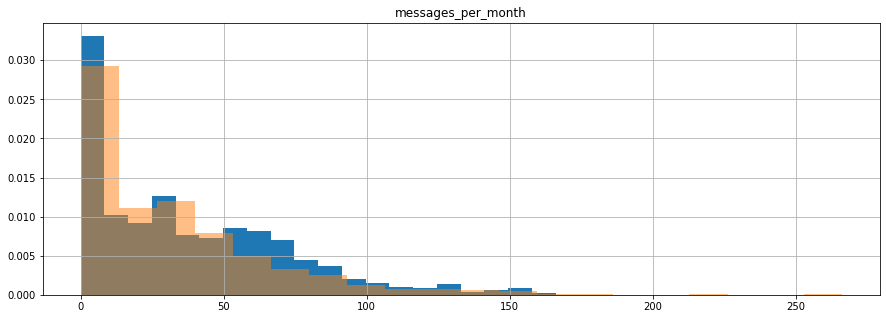

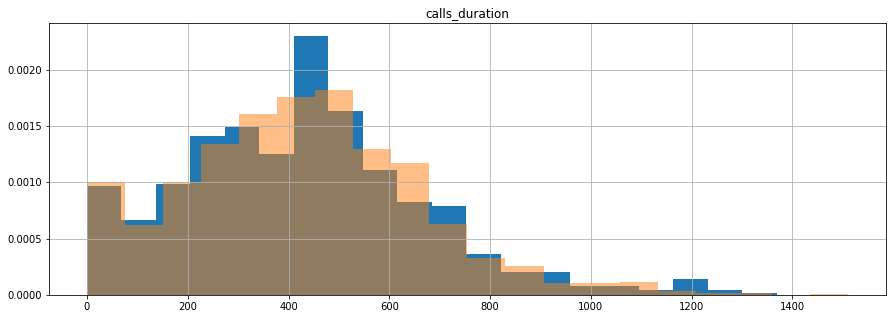

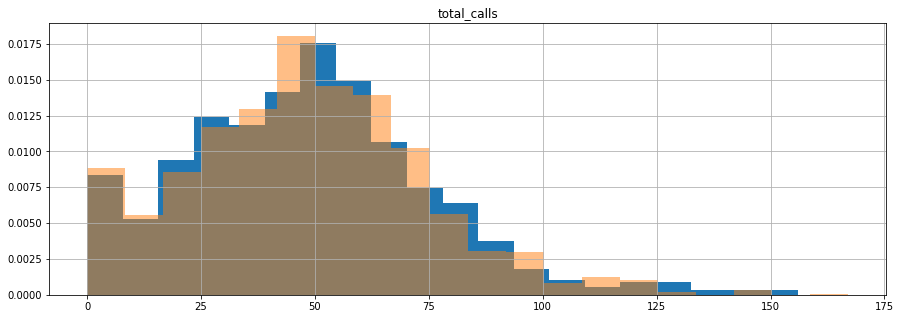

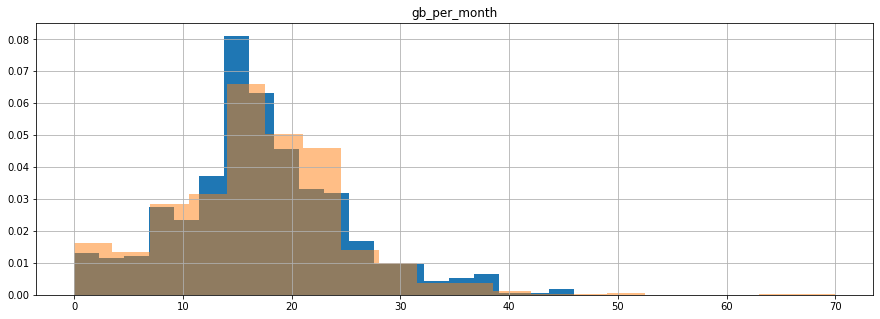

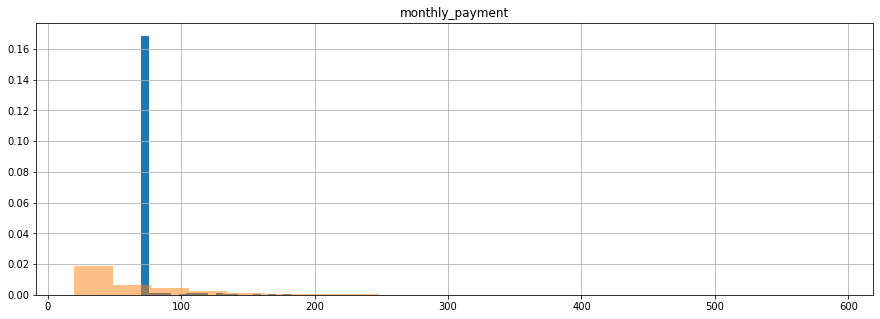

In [44]:
factors = ['messages_per_month', 'calls_duration', 'total_calls', 'gb_per_month', 'monthly_payment']

for factor in factors:
    ax = ultimate_data.hist(factor, density=True, figsize = (15,5), bins = 20)
    surf_data.hist(factor, density=True, ax = ax, alpha = 0.5, bins = 20)

With similar averages and variances, we expected for the graphs to be quite similiar and this is what we can see in the histograms/distributions above. Of-course its not perfectly similar but similar enough to represent the information we displayed in the previous chapter!

That's for the first 4 graphs, while the last graph, which is the monthly_payment graph displays a complete different story. And that's due to the fact that the surf plan dataframe variance is much much bigger than the ultimate plan dataframe variance.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- I will write overall thoughts about the data analysis section:
- Very nice visualization of the data. Great that you used different graph types to check available data.
- Also, nice that you managed to add both plans on one graph.
- It's a matter of taste, but sometimes it is easier to analyze the data (spread, averages, etc.) for each feature using a boxplot in addition to histograms. If you have time and willing to practice, you can display two charts (histogram and a boxplot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

### Testing the hyptheses

(1)

Null hypotheses: The average revenue from users of Ultimate and Surf calling plans doesn't differ.

Alt. hypotheses: The average revenue from users of Ultimate and Surf calling plans differs.

We'll start by checking the relation between the variances, are they equal/similar or not:

In [45]:
# Testing if the variances are similar using the st.levene() method
st.levene(surf_data['monthly_payment'], ultimate_data['monthly_payment'], center = 'mean') 

LeveneResult(statistic=598.0794664776852, pvalue=1.3114884106236739e-117)

The p-value of the test is very small, if we choose the alpha to be 5% then the p-value is way smaller than the alpha and this means that the variances are not equal. Therefore, in our hypotheses test we can give the var_equal parameter the value **False**:

In [46]:
alpha = 0.05 #  if the p-value is less than alpha, we reject the hypothesis

result = st.ttest_ind(surf_data['monthly_payment'], ultimate_data['monthly_payment'], equal_var = False) 

print('p-value: ', result.pvalue)
if (result.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value:  1.2184115852123163e-15
We reject the null hypothesis


After testing our hypotheses, it turns out that the pvalue is very small, way smaller than the  alpha that we chose (5%). Thus rejecting the null hypotheses is the answer. By rejecting the null hypotheses, we have to accept the alternative hypotheses which states that the average revenue from users of Ultimate and Surf calling plans differs. This can be seen in the information part at the first part of **Analyzing data** as well.

(2)

Null hypotheses: The average revenue from users in NY-NJ area is not different from that of the users from other regions.

Alt. hypotheses: The average revenue from users in NY-NJ area is different from that of the users from other regions.

We'll start by checking the relation between the variances, are they equal/similar or not:

In [47]:
# Seperating the groups (NY-NJ) and not (NY-NJ)
ny_nj_data = final_dataframe[final_dataframe['city'].str.contains('NY-NJ')]
rest_of_data = final_dataframe[~final_dataframe['city'].str.contains('NY-NJ')]

In [48]:
# Testing if the variances are similar using the st.levene() method
st.levene(ny_nj_data['monthly_payment'], rest_of_data['monthly_payment'], center = 'mean') 

LeveneResult(statistic=1.7386932171327514, pvalue=0.18743571504599707)

The p-value of the test is very big, if we choose the alpha to be 5% then the p-value is way bigger than the alpha and this means that the variances are actually equal/similar. Therefore, in our hypotheses test we can give the var_equal parameter the value **True**:

In [49]:
alpha = 0.05 #  if the p-value is less than alpha, we reject the hypothesis

result = st.ttest_ind(ny_nj_data['monthly_payment'], rest_of_data['monthly_payment'], equal_var = True) 

print('p-value: ', result.pvalue)
if (result.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value:  0.049745282774076104
We reject the null hypothesis


After testing our second hypotheses, it turns out that the pvalue is small, smaller than the alpha that we chose (5%). Thus rejecting the null hypotheses is the answer. By rejecting the null hypotheses, we have to accept the alternative hypotheses which states that the average revenue from users in NY-NJ area is different from that of the users from other regions. That means that despite the very similar variances for both of these dataframes, but the average revenue from users from NY-NJ area isn't similar to the average revenue of the rest of the users.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- Overall great job! Hypotheses have been formulated and tested correctly. Great that you additionally checked data that has been used for the test. 
- Your conclusions based on the results are also correct.
- Great that you additionally correctly compared the variances using Levene test.

## General Conclusions

To sum everything up,

(1) Step 1:
* We started with semi-clean data, we had minor updates and fixes in the data such as; fixing certain types and dropping useless rows.
* After we cleaned the data entirely, we started working on organizing the data in hand, into dataframes that represent the purpose of the  project more easily and clearly.
* Once we had everything organized in seperate dataframes, we again, chose the most important parameters from each dataframe and collected them all in one big dataframe and called it the **final_dataframe**. This dataframe included all the values and factors we needed to test our hypotheses and come with conclusions.

(2) Step 2: 
* We gathered information about our new dataframe, we calculated the mean, variance and deviation for each category
* After we gathered enough information, we then displayed our data distribution using histograms, confirming the information we got in step 2.1

(3) Step 3:
* Testing our first hypotheses, with null hypotheses: The average revenue from users of Ultimate and Surf calling plans doesn't differ. We figured out that the hypotheses isn't correct and we had to accept the alternative hypotheses that states that the average revenue from users of Ultimate and Surf calling plans differ.
* Testing our second hypotheses, with null hypotheses: The average revenue from users in NY-NJ area is not different from that of the users from other regions. We figured out that the hypotheses isn't correct and we had to accept the alternative hypotheses that states that the average revenue from users in NY-NJ area is different from that of the users from other regions.

(4) Final conclusion:
* The mean for the monthly payments of the surf plan data was 60.17 with a variance of 3046.5 and standard deviation of 55.19 and a median of ~40 and a total count of 
* The mean for the monthly payments of the ultimate plan data was 72.30 with a variance of 128.98 and standard deviation of 11.35 and a median of 70.0.
* Despite that the Ultimate plan had a higher average, but the **Surf plan was generating more profits**
1. The average monthly payment was way greater than the base payment for the Surf plan, as well as the median. While, on the Ultimate plan, both the mean and the median were almost equal to the base payment of 70 meaning people don't tend to go over the limits when using the Ultimate plan.
2. People tend to go over the limits of the plan and be charged extra money in the Surf plan, generating much more money over the base payment.
3. The prices of extra charges on the Surf plan are greater than those of the Ultimate plan, meaning the company will make x3 one texts and calls and ~x1.5 on data usage more profit of users from the Surf plan than from users from the Ultimate plan. With too much users going over the limits of the Surf plan, compared to users of the  Ultimate plan, then way much profits were being generated on the Surf plan.
4. The surf plan had more monthly payments in general than the Ultimate plan (1579 rows in surf plan df vs 724 rows in ultimate plan df) and this should be counted in to calculate the total profits from each plan. (60.17*1500 = 90,000 in total vs 72*724 = ~52,000 - Mulitplying the averages with the number of rows of each dataframe to see how much profit each plan generated in total - **Surf plan wins**) 

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
- You conducted an outstanding research with correct interim findings, clean code and nice visualisation.
- I also like your overall conclusion. It is very structured and provides insights and recommendations to the business.